In [25]:
using Plots, DelimitedFiles
gr(fmt = "png")

Plots.GRBackend()

## Geodésicas en Schwarzschild

In [26]:
include("schwarzschild.jl")

En vez de resolver la ecuación de la geodésica podemos usar las cantidades conservadas en Schwarzschild, las cuales son

$$ \varepsilon = \left( 1 - \dfrac{2M}{r} \right)\dfrac{dt}{d\lambda}, $$

$$ \ell = r^{2}\sin^{2}\theta \dfrac{d\varphi}{d\lambda}. $$

Debido a la simetría esférica las trayectorias que siguen partículas libres ocurren en un plano; por simplicidad elegimos el plano ecuatorial $\theta = \pi/2$. Además, debido a la invariancia del intervalo la cantidad

$$ e = g_{\mu\nu}\dfrac{dx^{\mu}}{d\lambda}\dfrac{dx^{\nu}}{d\lambda} $$

es una constante a lo largo de las geodésicas. Para partículas con masa $e = -1$, mientras que para fotones $e = 0$. Entonces, bajo la suposición de que $\theta = \pi/2$

$$ e = g_{\mu\nu}\dfrac{dx^{\mu}}{d\lambda}\dfrac{dx^{\nu}}{d\lambda} = -\left( 1 - \dfrac{2M}{r} \right) 
\left( \dfrac{dt}{d\lambda} \right)^2 + \left( 1 - \dfrac{2M}{r} \right)^{-1}\left( \dfrac{dr}{d\lambda} \right)^2 + r^{2}\left( \dfrac{d\varphi}{d\lambda} \right)^{2}.$$

Con ayuda de las cantidades conservadas podemos escribir lo anterior como

$$ -\varepsilon^{2} + \left( \dfrac{dr}{d\lambda} \right)^{2} + \left( 1 - \dfrac{2M}{r} \right)\dfrac{\ell^{2}}{r^{2}} = e\left( 1 - \dfrac{2M}{r} \right), $$

o equivalentemente

$$ \dfrac{1}{2}\left( \dfrac{dr}{d\lambda} \right)^{2} + V(r) = \dfrac{1}{2} \varepsilon^{2},$$

donde hemos definido el potencial efectivo como $V(r) = \dfrac{1}{2}\left( 1 - \dfrac{2M}{r} \right)\left( \dfrac{\ell^2}{r^2} - e \right)$. Entonces, para el caso de los fotones

\begin{align}
\left( \dfrac{dr}{d\lambda} \right)^{2} &= \varepsilon^{2} - 2V(r), \qquad V(r) = \dfrac{\ell^{2}}{2r^{2}} \left( 1 - \dfrac{2M}{r} \right), \\
\left( \dfrac{d\varphi}{d\lambda} \right)^{2} &= \dfrac{\ell^{2}}{r^{4}}. 
\end{align}

Combinando ambas ecuaciones se tiene que

\begin{equation}
\left( \dfrac{dr}{d\varphi} \right)^{2} = \left( \dfrac{\frac{dr}{d\lambda}}{\frac{d\varphi}{d\lambda}} \right)^{2} = r^{4} \left[ \dfrac{\varepsilon^{2}}{\ell^{2}} - \dfrac{1}{r^{2}} \left( 1 - \dfrac{2M}{r} \right) \right] = r^{4} \left[ \dfrac{1}{b^{2}} - \dfrac{1}{r^{2}} \left( 1 - \dfrac{2M}{r} \right) \right],
\end{equation}

donde hemos definido el parámetro $b = \ell/\varepsilon$. Derivando nuevamente esta ecuación queda

$$ 2\dfrac{dr}{d\varphi}\dfrac{d^{2}r}{d\varphi^{2}} = \dfrac{4r^{3}}{b^{2}}\dfrac{dr}{d\varphi} - 2r\dfrac{dr}{d\varphi} + 2M\dfrac{dr}{d\varphi}, $$

con lo que finalmente nos queda

\begin{equation}
\dfrac{d^{2}r}{d\varphi^{2}} =  \dfrac{2r^{3}}{b^{2}} - r + M.
\end{equation}

Para resolverla necesitamos las condiciones iniciales $r \big|_{\varphi_{0}} = r_{0}$ y $\dfrac{dr}{d\varphi}\Biggr|_{\varphi_{0}}$; para la segunda condición hay que recordar que $g_{\mu\nu}dx^{\mu}dx^{\nu} = 0$, con lo que podemos decir que

\begin{align*}
0 = g_{\mu\nu}\dfrac{dx^{\mu}}{d\lambda}\dfrac{dx^{\nu}}{d\lambda} &=  -\left( 1 - \dfrac{2M}{r} \right) \left( \dfrac{dt}{d\lambda} \right)^{2} + \left( 1 - \dfrac{2M}{r} \right)^{-1}\left( \dfrac{dr}{d\lambda} \right)^{2} + r^{2}\left( \dfrac{d\varphi}{d\lambda} \right)^{2}\\
&= -\left( 1 - \dfrac{2M}{r} \right)^{-1}\varepsilon^{2} + \left( 1 - \dfrac{2M}{r} \right)^{-1}\left( \dfrac{dr}{d\lambda} \right)^{2} + \dfrac{\ell^{2}}{r^{2}},
\end{align*}

por lo que 

$$ \dfrac{dr}{d\lambda} = \pm \left( 1 - \dfrac{2M}{r} \right) \sqrt{\left( 1 - \dfrac{2M}{r} \right)^{-1}\varepsilon^{2} - \dfrac{\ell^{2}}{r^{2}}},$$

donde nos quedamos con el signo - si es que va cayendo, luego $\dfrac{d\varphi}{d\lambda} = \dfrac{\ell}{r^{2}}$, por lo que

$$ \dfrac{dr}{d\varphi} = \dfrac{dr}{d\lambda} \Big/ \dfrac{d\varphi}{d\lambda} $$

  0.202558 seconds (1.27 M allocations: 20.418 MiB, 40.63% gc time)


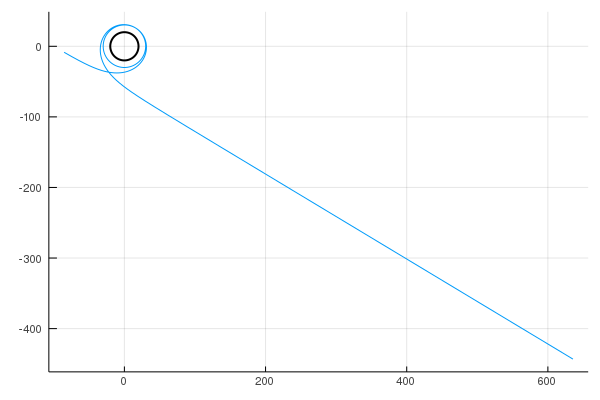

In [28]:
M = 10

ϵ = 1
b = 3*sqrt(3)*M + 3.4823*M*exp(-2*π*2)
l = ϵ*b

r0 = 10*M
u0 = 1/r0
ϕ0 = π
ϕ_final = ϕ0 + 5.0π
dϕ = 0.001

@time xs, ys = impact_parameter2(ϕ0, ϕ_final, r0, dϕ);

dibujar_trayectoria(xs, ys)

  2.564192 seconds (22.00 M allocations: 345.701 MiB, 27.74% gc time)


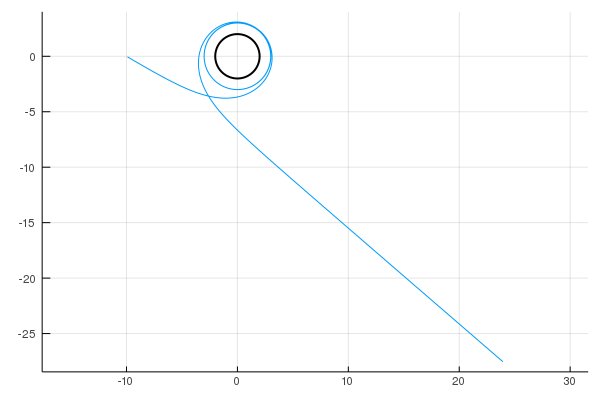

In [30]:
M = 1

ϵ = 0.1
b = 3*sqrt(3)*M + 3.4823*M*exp(-5*π*2)
l = ϵ*b

r0 = 10*M
ϕ0 = π

λ_final = 1000
dλ = 10.0^(-2)

@time xs, ys, ds, rs = geodesics(λ_final, dλ, r0, ϕ0);

dibujar_trayectoria(xs, ys)

 22.599338 seconds (146.62 M allocations: 2.854 GiB, 10.55% gc time)


┌ Info: Saved animation to 
│   fn = /home/usuario/Documentos/Física/Servicio/Julia/n_5.gif
└ @ Plots /home/usuario/.julia/packages/Plots/WwFyB/src/animation.jl:98


Plots.AnimatedGif("/home/usuario/Documentos/Física/Servicio/Julia/n_5.gif")
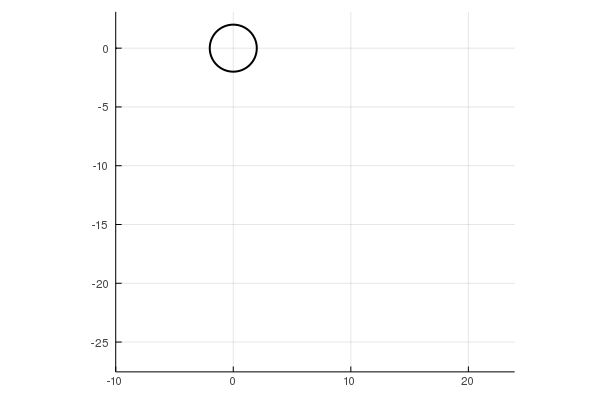

In [5]:
@time n_5 = @animate for i in 1:1000:length(xs)
    
    xs_p = array_i(xs, i)
    ys_p = array_i(ys, i)
    
    x_f = [xs_p[i]]
    y_f = [ys_p[i]]
    
    x_min, x_max = minimum(xs), maximum(xs)
    y_min, y_max = minimum(ys), maximum(ys)
    
    dibujar_trayectoria(xs_p, ys_p, 10)
    scatter!(x_f, y_f, color = "black", markersize = 1)
    plot!(xlims = (x_min, x_max), ylims = (y_min, y_max)) 
        
end

gif(n_5, "n_5.gif", fps = 20) 

Aquí podemos ver cómo son las trayectorias para $b_{n}$ con $n = 1,2,3,4,5$

![n_1](n_1.gif "n=1")
![n_2](n_2.gif "n=2")
![n_3](n_3.gif "n=3")
![n_4](n_4.gif "n=4")
![n_5](n_5.gif "n=5")

Las ecuaciones de la geodésica para el caso de Schwarzschild son

\begin{align}
\dfrac{d^2 t}{d\lambda^2} &= \dfrac{2M}{2Mr - r^2} \left( \dfrac{dt}{d\lambda} \right) \left( \dfrac{dr}{d\lambda} \right), \\
\dfrac{d^2 r}{d\lambda^2} &= \dfrac{M(2M-r)}{r^3} \left( \dfrac{dt}{d\lambda} \right)^{2} - \dfrac{M}{2Mr - r^2} \left( \dfrac{dr}{d\lambda} \right)^{2} - (2M - r) \left( \dfrac{d\theta}{d\lambda} \right)^{2} - (2M - r)\sin^{2}\theta \left( \dfrac{d\phi}{d\lambda} \right)^{2}, \\
\dfrac{d^2 \theta}{d\lambda^2} &= - \dfrac{2}{r} \left( \dfrac{dr}{d\lambda} \right) \left( \dfrac{d\theta}{d\lambda} \right) + \cos\theta\sin\theta \left( \dfrac{d\phi}{d\lambda} \right)^{2}, \\
\dfrac{d^2 \phi}{d\lambda^2} &= -\dfrac{2}{r} \left( \left( \dfrac{dr}{d\lambda} \right) + r\cot\theta \left( \dfrac{d\theta}{d\lambda} \right) \right) \left( \dfrac{d\phi}{d\lambda} \right).
\end{align}

Tomando $\theta = \pi / 2$ y considerando las cantidades conservadas $\ell = r^{2}\sin^{2}\theta \frac{d\phi}{d\lambda}$, $\epsilon = \left(1-\frac{2M}{r}\right)\frac{dt}{d\lambda}$ las ecuaciones para $r$ y $\phi$ quedan

\begin{align}
\dfrac{d^2 r}{d\lambda^2} &= -\dfrac{M\epsilon^2}{r^2}\left( 1 - \dfrac{2M}{r}\right)^{-1} - \dfrac{M}{2Mr - r^2} \left( \dfrac{dr}{d\lambda} \right)^{2} + \left( 1 - \dfrac{2M}{r}\right)\dfrac{\ell^{2}}{r^3},\\
\dfrac{d^2 \phi}{d\lambda^2} &= -\dfrac{2}{r}\dfrac{dr}{d\lambda}\dfrac{d\phi}{d\lambda}.
\end{align}

O usando $\ell$ en la ecuación de $\theta$

\begin{align}
\dfrac{d^2 r}{d\lambda^2} &= -\dfrac{M\epsilon^2}{r^2}\left( 1 - \dfrac{2M}{r}\right)^{-1} - \dfrac{M}{2Mr - r^2} \left( \dfrac{dr}{d\lambda} \right)^{2} + \left( 1 - \dfrac{2M}{r}\right)\dfrac{\ell^{2}}{r^3},\\
\dfrac{d\phi}{d\lambda} &= \dfrac{\ell}{r^2}.
\end{align}

 39.077589 seconds (260.16 M allocations: 3.926 GiB, 39.47% gc time)


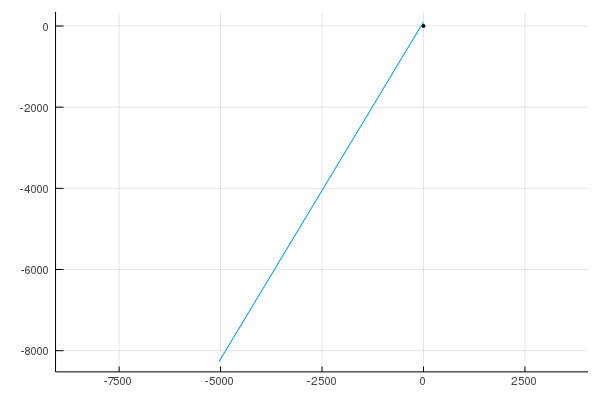

In [6]:
M = 10
ϵ = 10
b = 3*sqrt(3)*M + 3.4823*M*exp(-2*π*2)
l = ϵ*b

r0 = 10*M
u0 = 1/r0
ϕ0 = π/2

λ_final = 1000
dλ = 10.0^(-3)

@time xs, ys, ds = geodesics2(λ_final, dλ, r0, ϕ0);

dibujar_trayectoria(xs, ys, 100)

## Sombra

In [7]:
ξ(r, θ, ℓ, ϵ) = ℓ/ϵ

function L(r, θ, ℓ, ϵ)
    
    Δ = r^2 - 2*M*r
    dr_dλ = -sqrt((1-2*M/r)*(ϵ^2*(1-2*M/r)^(-1.0)-(ℓ/r)^2))
    K = (r^2*ϵ)^2/Δ - (r^4*(dr_dλ)^2)/Δ
    
    #K = (ℓ*csc(θ))^2 
    
    return K - ℓ^2
    
end

η(r, θ, ℓ, ϵ) = L(r, θ, ℓ, ϵ)/ϵ^2

η (generic function with 1 method)

In [8]:
function ξ(r, M, a)
    
    Δ = r^2- 2M*r + a^2 
    
    return ((r^2 - a^2)*M - Δ*r)/(a*(r-M))
    #return (a^2*(M+r) + r*(r*(r-3*M) + 2*Q))/(a*(M-r))
    
end

function η(r, M, a)
    
    Δ = r^2- 2M*r + a^2 
    
    return (r^3*(4*M*Δ - r*(r-M)^2))/(a^2*(r-M)^2)
    #return (r^2*(4*M*a^2*(M*r-Q) - (r*(r-3*M) + 2Q)^2))/(a^2*(r-M)^2)
end

η (generic function with 2 methods)

In [33]:
α(r, θ, M, a) = -ξ(r, M, a)*csc(θ)
β(r, θ, M, a) = (sqrt(Complex(η(r, M, a) + (a*cos(θ))^2 - (ξ(r, M, a)*cot(θ))^2)))

β (generic function with 1 method)

In [51]:
function sombra(M, a, θ)
    
    if M < a
        return "M < a"
    end
    
    grafica = plot(legend=false, aspect_ratio = 1)
    
    rs = range(2.345M, stop=3.535*M,length=500)
    
    αs = [α(r, θ, M, a) for r in rs]
    βs = [β(r, θ, M, a) for r in rs]
    
    grafica = plot!(αs, βs, color = "black")
    grafica = plot!(αs, -βs, color = "black")
    grafica = plot!(xlims = (-10M, 10M), ylims = (-10M, 10M))
    
    return βs
    
end

sombra (generic function with 1 method)

In [53]:
βs = sombra(10, 0.9, π/2)

for β in βs
    println(β)
end

0.0 + 292.72104680657344im
0.0 + 291.7009610630141im
0.0 + 290.680524988867im
0.0 + 289.6597318251924im
0.0 + 288.6385748312939im
0.0 + 287.6170472839925im
0.0 + 286.59514247689293im
0.0 + 285.5728537196508im
0.0 + 284.55017433722765im
0.0 + 283.52709766914234im
0.0 + 282.50361706871166im
0.0 + 281.4797259022913im
0.0 + 280.45541754850234im
0.0 + 279.4306853974527im
0.0 + 278.40552284995135im
0.0 + 277.37992331671137im
0.0 + 276.3538802175501im
0.0 + 275.3273869805692im
0.0 + 274.30043704133567im
0.0 + 273.2730238420492im
0.0 + 272.24514083069624im
0.0 + 271.21678146019786im
0.0 + 270.1879391875412im
0.0 + 269.15860747290355im
0.0 + 268.12877977876224im
0.0 + 267.09844956899286im
0.0 + 266.06761030794894im
0.0 + 265.03625545953895im
0.0 + 264.0043784862762im
0.0 + 262.97197284832373im
0.0 + 261.93903200251714im
0.0 + 260.9055494013756im
0.0 + 259.87151849209664im
0.0 + 258.8369327155262im
0.0 + 257.801785505124im
0.0 + 256.7660702858973im
0.0 + 255.72978047332165im
0.0 + 254.6929094722

0.0 + 130.12858154218625im
0.0 + 131.53281269855262im
0.0 + 132.93614909950796im
0.0 + 134.33865010624766im
0.0 + 135.74037265776852im
0.0 + 137.14137139801088im
0.0 + 138.54169879485406im
0.0 + 139.94140525160114im
0.0 + 141.3405392115041im
0.0 + 142.73914725582026im
0.0 + 144.13727419590484im
0.0 + 145.53496315974903im
0.0 + 146.9322556733497im
0.0 + 148.32919173732012im
0.0 + 149.72580989899544im
0.0 + 151.12214732041505im
0.0 + 152.51823984242154im
0.0 + 153.9141220451573im
0.0 + 155.30982730516246im
0.0 + 156.7053878493674im
0.0 + 158.1008348060817im
0.0 + 159.4961982532883im
0.0 + 160.89150726430708im
0.0 + 162.2867899510647im
0.0 + 163.68207350509564im
0.0 + 165.07738423640774im
0.0 + 166.47274761035823im
0.0 + 167.86818828264717im
0.0 + 169.26373013254852im
0.0 + 170.6593962944866im
0.0 + 172.05520918804518im
0.0 + 173.4511905465074im
0.0 + 174.8473614440103im
0.0 + 176.24374232139277im
0.0 + 177.64035301080645im
0.0 + 179.0372127591702im
0.0 + 180.43434025053122im
0.0 + 181.83